In [2]:
import pandas as pd
import numpy as np
import IPython
import random
import matplotlib.pyplot as plt

In [3]:
file_name="data_000637.txt"
DF = pd.read_csv(file_name, nrows = 10000)
DF

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
9995,1,0,61,3869200267,696,11
9996,1,0,60,3869200267,701,5
9997,1,0,59,3869200267,707,23
9998,1,0,63,3869200267,706,15


In [41]:
x = DF['BX_COUNTER'].max()
print("Number of BX in an ORBIT is {}".format(x))

Number of BX in an ORBIT is 3563


In [47]:
DF['Time'] = DF['ORBIT_CNT']*x*25 + DF['BX_COUNTER']*25 + DF['TDC_MEAS']*25/30
timens_min = np.min(DF['Time'])
timens_max = np.max(DF['Time'])
time = timens_max - timens_min
print('Time in ns:', time)


Time in ns: 8867564.125


In [46]:
DF

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,Time
0,1,0,123,3869200167,2374,26,3.446490e+14
1,1,0,124,3869200167,2374,27,3.446490e+14
2,1,0,63,3869200167,2553,28,3.446490e+14
3,1,0,64,3869200167,2558,19,3.446490e+14
4,1,0,64,3869200167,2760,25,3.446490e+14
...,...,...,...,...,...,...,...
9995,1,0,61,3869200267,696,11,3.446490e+14
9996,1,0,60,3869200267,701,5,3.446490e+14
9997,1,0,59,3869200267,707,23,3.446490e+14
9998,1,0,63,3869200267,706,15,3.446490e+14


In [49]:
DF_ran = DF.copy()
DF_ran["HEAD"] = np.random.randint(0,2,len(DF["HEAD"]))
DF_ran

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,Time
0,1,0,123,3869200167,2374,26,3.446490e+14
1,1,0,124,3869200167,2374,27,3.446490e+14
2,1,0,63,3869200167,2553,28,3.446490e+14
3,0,0,64,3869200167,2558,19,3.446490e+14
4,1,0,64,3869200167,2760,25,3.446490e+14
...,...,...,...,...,...,...,...
9995,1,0,61,3869200267,696,11,3.446490e+14
9996,0,0,60,3869200267,701,5,3.446490e+14
9997,0,0,59,3869200267,707,23,3.446490e+14
9998,0,0,63,3869200267,706,15,3.446490e+14


In [50]:
DFnew = DF_ran.loc[DF_ran['HEAD']==1]
DFnew

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,Time
0,1,0,123,3869200167,2374,26,3.446490e+14
1,1,0,124,3869200167,2374,27,3.446490e+14
2,1,0,63,3869200167,2553,28,3.446490e+14
4,1,0,64,3869200167,2760,25,3.446490e+14
5,1,0,63,3869200167,2762,4,3.446490e+14
...,...,...,...,...,...,...,...
9987,1,0,61,3869200267,609,14,3.446490e+14
9988,1,0,56,3869200267,617,27,3.446490e+14
9992,1,0,63,3869200267,614,28,3.446490e+14
9994,1,0,57,3869200267,696,27,3.446490e+14


<Figure size 432x288 with 0 Axes>

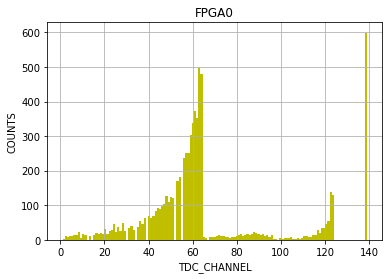

In [64]:
B = DF['TDC_CHANNEL'].max()
plt.figure()
DF.loc[DF['FPGA']==0].hist('TDC_CHANNEL',color='y', bins = B )
plt.title('FPGA0')
plt.xlabel('TDC_CHANNEL')
plt.ylabel('COUNTS')
plt.show()

<Figure size 432x288 with 0 Axes>

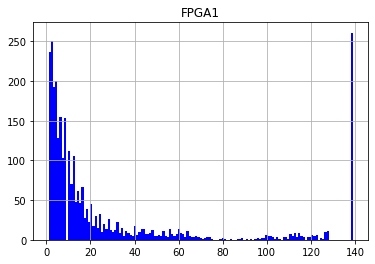

In [65]:
plt.figure()
DF.loc[DF['FPGA']==1].hist('TDC_CHANNEL',color='blue', bins = B)
plt.title('FPGA1')
plt.show()

In [66]:
DF['count'] = np.ones(len(DF))
DFnew = DF.loc[:, ['TDC_CHANNEL', 'count']]
DFnew = DFnew.groupby('TDC_CHANNEL').sum()
DFnew

,count
TDC_CHANNEL,
1,241.0
2,260.0
3,201.0
4,211.0
5,139.0
...,...
125,2.0
126,1.0
127,10.0


In [67]:
DFnew = DFnew.sort_values(by='count', ascending = False)
DFnew

,count
TDC_CHANNEL,
139,860.0
63,499.0
64,491.0
61,380.0
62,360.0
...,...
98,4.0
67,3.0
99,3.0


In [68]:
noisy_ch = DFnew.head(3).index
print(noisy_ch)
DFnew.head(3)

Int64Index([139, 63, 64], dtype='int64', name='TDC_CHANNEL')


,count
TDC_CHANNEL,
139,860.0
63,499.0
64,491.0


In [69]:
DFnew = DF.loc[DF['TDC_CHANNEL']==139]
DFnew = DFnew.groupby('ORBIT_CNT')
n = DFnew.count().shape[0]
print("Number of unique orbits:", n)      

Number of unique orbits: 101
